In [1]:
from fastai.conv_learner import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix
from tools.data_wrangling import folders_to_csv

In [2]:
import seaborn as sns

In [3]:
PATH = 'data/plant-seedlings-classification/'
label_csv = os.path.join(PATH, 'labels.csv')
train_path = os.path.join(PATH, 'train')

Because I want to take advantage of the fastai library, I need to change my training folder directory structure from using a directory for each class,
![folder_training_style](../pictures/plant-seedlings-classification/folder_style.png)

to putting all images into a single train folder and a csv file that describes what species corresponds to each filename
![csv_training_style](../pictures/plant-seedlings-classification/csv_style.png)

In [4]:
folders_to_csv(train_path, label_csv)

label.csv already exists - exiting


In [5]:
pd.read_csv(label_csv).head()

,file,species
0,89b84d6e9.png,Charlock
1,67e37de9b.png,Charlock
2,a30113dfc.png,Charlock
3,88c8cbb35.png,Charlock
4,ba2cfd858.png,Charlock


In [6]:
sz = 224
arch = resnet50
bs = 64

In [7]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
# val_idxs = 0

In [9]:
# !rm -rf {PATH}tmp

In [10]:
def get_data(sz, bs, arch):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data.resize(int(sz*1.3)) if sz > 300 else data.resize(340, 'tmp')

In [11]:
data = get_data(sz, bs, arch)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

![cached pictures](../pictures/plant-seedlings-classification/cached_pictures.png)

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=.5)

100%|██████████| 13/13 [00:02<00:00,  4.55it/s]


initial training for the newly added layer - don't want to mess it up

In [13]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 55%|█████▌    | 33/60 [00:00<00:00, 35.30it/s, loss=16.5]


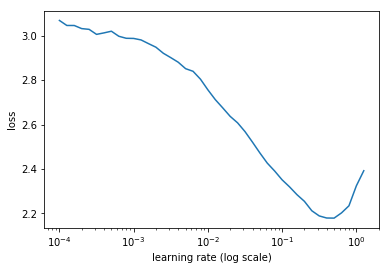

In [14]:
fig = learn.sched.plot()

In [16]:
learn.fit(.01, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 1.473887, val_loss: 0.945972, accuracy: 0.716127
epoch:   1, train_loss: 1.042573, val_loss: 0.612560, accuracy: 0.799576
epoch:   2, train_loss: 0.794341, val_loss: 0.566117, accuracy: 0.815394
epoch:   3, train_loss: 0.691730, val_loss: 0.501934, accuracy: 0.824576
epoch:   4, train_loss: 0.599775, val_loss: 0.463837, accuracy: 0.837461
epoch:   5, train_loss: 0.535316, val_loss: 0.434631, accuracy: 0.847222
epoch:   6, train_loss: 0.490606, val_loss: 0.432736, accuracy: 0.849498



In [17]:
learn.precompute = False
learn.fit(.01, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.699297, val_loss: 0.447728, accuracy: 0.832639
epoch:   1, train_loss: 0.669836, val_loss: 0.444544, accuracy: 0.841165
epoch:   2, train_loss: 0.630022, val_loss: 0.418204, accuracy: 0.848264
epoch:   3, train_loss: 0.634230, val_loss: 0.412823, accuracy: 0.854707
epoch:   4, train_loss: 0.596411, val_loss: 0.396587, accuracy: 0.855556
epoch:   5, train_loss: 0.579912, val_loss: 0.378027, accuracy: 0.863233
epoch:   6, train_loss: 0.550418, val_loss: 0.375974, accuracy: 0.863040



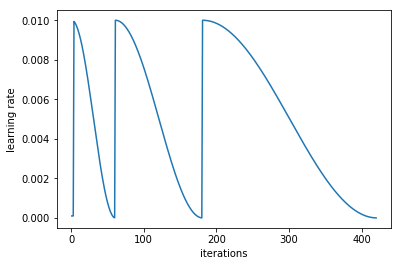

In [18]:
learn.sched.plot_lr()

In [19]:
def model_save_load(filename):
    save_or_load = input()
    if save_or_load == 'save':
        learn.save(filename)
    if save_or_load == 'load':
        learn.load(filename)

In [20]:
model_save_load('initial_training')

save


In [21]:
learn.unfreeze()

In [22]:
lr = .01

In [24]:
learn.load('initial_training')
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)
loss_clr = learn.sched.losses

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.466716, val_loss: 0.220463, accuracy: 0.916358
epoch:   1, train_loss: 0.294999, val_loss: 0.148009, accuracy: 0.944213
epoch:   2, train_loss: 0.209289, val_loss: 0.124722, accuracy: 0.953781
epoch:   3, train_loss: 0.194350, val_loss: 0.177662, accuracy: 0.936265
epoch:   4, train_loss: 0.157600, val_loss: 0.104532, accuracy: 0.963349
epoch:   5, train_loss: 0.126623, val_loss: 0.085857, accuracy: 0.968750
epoch:   6, train_loss: 0.106134, val_loss: 0.085664, accuracy: 0.969792



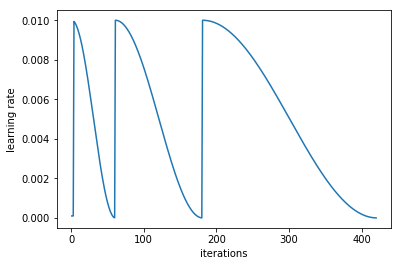

In [25]:
learn.sched.plot_lr()

In [26]:
model_save_load('resnet50_224')

save


In [28]:
learn.set_data(get_data(299,32,arch))
learn.precompute = False
learn.unfreeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [29]:
lr = .01

In [30]:
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.183883, val_loss: 0.095274, accuracy: 0.968371
epoch:   1, train_loss: 0.187859, val_loss: 0.128063, accuracy: 0.956818
epoch:   2, train_loss: 0.128172, val_loss: 0.082046, accuracy: 0.974527
epoch:   3, train_loss: 0.146758, val_loss: 0.114525, accuracy: 0.965152
epoch:   4, train_loss: 0.128382, val_loss: 0.088247, accuracy: 0.970360
epoch:   5, train_loss: 0.084532, val_loss: 0.078604, accuracy: 0.969792
epoch:   6, train_loss: 0.068853, val_loss: 0.080130, accuracy: 0.969792



In [31]:
n_cycle = 5

In [32]:
learn.fit([lr/9, lr/3, lr], n_cycle=n_cycle, cycle_len=4, cycle_mult=1, cycle_save_name='ensemble')

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

epoch:   0, train_loss: 0.123303, val_loss: 0.172874, accuracy: 0.941667
epoch:   1, train_loss: 0.076787, val_loss: 0.073465, accuracy: 0.976610
epoch:   2, train_loss: 0.055402, val_loss: 0.063237, accuracy: 0.979167
epoch:   3, train_loss: 0.047215, val_loss: 0.059882, accuracy: 0.982860
epoch:   4, train_loss: 0.084374, val_loss: 0.087245, accuracy: 0.967235
epoch:   5, train_loss: 0.071001, val_loss: 0.065685, accuracy: 0.973485
epoch:   6, train_loss: 0.039767, val_loss: 0.061590, accuracy: 0.983333
epoch:   7, train_loss: 0.038136, val_loss: 0.058786, accuracy: 0.984375
epoch:   8, train_loss: 0.067933, val_loss: 0.100532, accuracy: 0.964110
epoch:   9, train_loss: 0.055038, val_loss: 0.085036, accuracy: 0.971875
epoch:  10, train_loss: 0.035078, val_loss: 0.061830, accuracy: 0.978693
epoch:  11, train_loss: 0.025623, val_loss: 0.059100, accuracy: 0.980777
epoch:  12, train_loss: 0.056859, val_loss: 0.096469, accuracy: 0.972443
epoch:  13, train_loss: 0.045081, val_loss: 0.07982

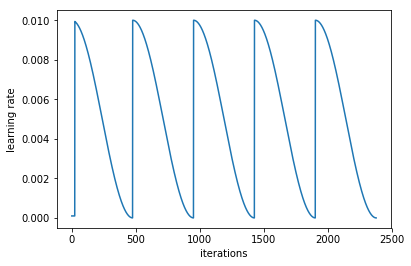

In [33]:
learn.sched.plot_lr()

In [34]:
log_preds_all = []
for i in range(n_cycle):
    learn.load(f'ensemble_cyc_{i}')
    log_preds, _ = learn.TTA(is_test=True, n_aug=8)
    log_preds = np.mean(log_preds, axis=0)
    log_preds_all.append(log_preds)

In [35]:
log_preds_mean = np.mean(np.array(log_preds_all), axis=0)

In [36]:
preds = np.argmax(np.exp(log_preds_mean), axis=1)

In [ ]:
# log_preds, _ = learn.TTA(is_test=False, n_aug=8)
# log_preds = np.mean(log_preds, axis=0)
# preds = np.argmax(np.exp(log_preds), axis=1)

In [ ]:
# def test_predictions(learn):
#     log_preds,y = learn.TTA(is_test=True, n_aug=8)
#     probs = np.mean(np.exp(log_preds), axis=0)
#     preds = np.argmax(probs, axis=1)
#     return preds

In [ ]:
# preds = test_predictions(learn)

In [43]:
def kaggle_submit(PATH, preds, data, sub_num):
    class_preds = [data.classes[x].replace('_', ' ') for x in preds]

    assert(len(class_preds) == len(data.test_ds.fnames))

    files = [x.split('/')[-1] for x in data.test_ds.fnames]

    df = pd.DataFrame(list(zip(files, class_preds)))
    df.columns = ['file', 'species']

    submit_folder = os.path.join(PATH, 'submit')
    submit_filepath = os.path.join(submit_folder, f'plant_submission{sub_num}.gz')
    os.makedirs(submit_folder, exist_ok=True)
    df.to_csv(submit_filepath, compression='gzip', index=False)
    return submit_filepath

In [44]:
print(kaggle_submit(PATH, preds, data, '2'))

data/plant-seedlings-classification/submit/plant_submission2.gz
